# Assignment 7

## Hamiltonian Monte Carlo

In [1]:
# Import cell
import numpy as np
import matplotlib.pyplot as plt

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [1]:
# Utils cell
N = 1000000
LEAP_STEP = 25 # leapfrog step
LAMBDA = 2 
EPSILON = 0.1

def prob_exp(x, lamb):
    return lamb * np.exp(-lamb*x)

def compute_U(q, lam):
    return lam*q-np.log(lam)

def compute_K(p):
    return p**2/2


The Hamiltonian $H_{q,p}=U(q)+K(p)$ is an energy function for the joint state of position q and momentum p, it defines the joint distribution $p_{q,p}=\frac{1}{Z}e^{\frac{-U(q)}{T}}e^{\frac{-K(q)}{T}}$ where q represent the variables of interest and p provide the dynamics.

The posterior distribution can be expressed as a **canonical distribution** (𝑇 = 1) using a potential energy function defined as: $U(q)=-{\sf log}(\pi(q)L(q\mid D))$, where $\pi(q)$ is the prior distribution and $L(q\mid D)$ is the **Likelihood function**.
In our case the posterior distribution, given by the product of the prior with the likelihhod is our target function so I have: $U(q)=-{\sf log}({\sf Exp(\lambda)}) = -{\sf log}(\lambda e^{-\lambda x}) = \lambda q - {\sf log}(\lambda)$

In [3]:
q = np.zeros(N)
q[0] = LAMBDA

for i in range(N-1):
    q0 = q[i]
    q1 = q0
    p0 = np.random.normal(0,1)
    p1 = p0

    for j in range(LEAP_STEP):
        p1 -= EPSILON/2 * LAMBDA
        q1 += EPSILON*p1
        if q1<0:
            q1 = -1*q1
            p1 = -1*p1
        p1 -= EPSILON/2 * LAMBDA
    
    p1 = -1*p1

    U0,U1 = compute_U(q0, LAMBDA), compute_U(q1, LAMBDA)
    K0,K1 = compute_K(p0), compute_K(p1)
    
    acceptance = np.exp(U0 - U1 + K0 - K1)

    if(np.random.uniform(0,1) <= acceptance):
        q[i+1] = q1
    else:
        q[i+1] = q0

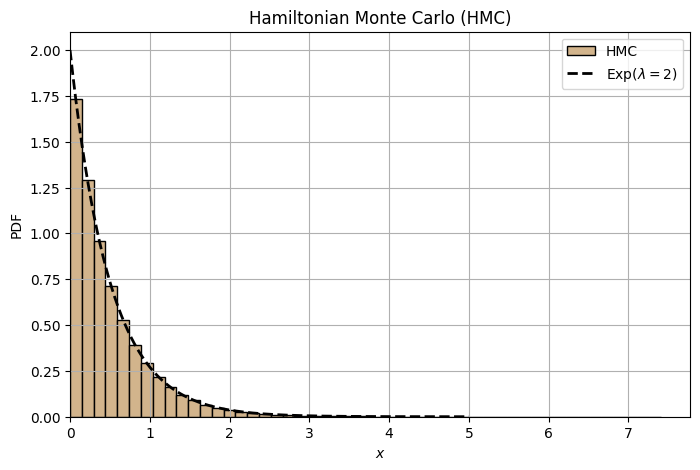

In [4]:
BINS = 50
x = np.linspace(0, 5, 2000)

fig, axs = plt.subplots(1, 1, figsize =[8,5])

axs.hist(q, bins = BINS, density=True, color="tan", edgecolor = "black", label="HMC")
axs.plot(x, prob_exp(x,LAMBDA),linestyle='dashed', color="black", linewidth=2, label=f"Exp($\lambda={LAMBDA}$)")

axs.set_xlabel ('$x$', fontsize = 10)
axs.set_ylabel ('PDF', fontsize = 10)
axs.set_title('Hamiltonian Monte Carlo (HMC)')
axs.set_xlim(left=0)
axs.legend()
axs.grid()

plt.show()

**Question 1**:
The canonical distribution is $π(q,p) = π(p|q)π(q)$, where $π(q)$ is our **target** distribution. The canonical density $π(q, p)$ does not depend on a particular choice of parameterization, because of the duality of the target parameters q and the auxiliary momentum p.

So we can write it in terms of an invariant Hamiltonian function, the energy $H(q,p)$, obtaining:  $π(q, p) = e^{−H(q,p)}$. Then we obtain: $H(q,p) = −log(π(q,p))  \rightarrow H(q, p) = − log(π(p|q)) − log(π(q)) = K(p,q) + U(q)$. 

So $U(q)$ is defined as: $U(q) = − log(π(q))$. In our case $π(q) \sim Exp(\lambda) \rightarrow π(q) = \lambda e^{-\lambda x}$, then: $U(q) = -log(\lambda e^{-\lambda x}) = -log(exp(log \lambda - \lambda q)) = - log \lambda + \lambda q$. Then $U(q) = - log \lambda + \lambda q$ is our Potential Energy Function.

**Question 2**: Functions needed in the HMC Algorithm:
- **Kinetic Energy Function**: $K(p) = p^2/2$
- **Potential Energy Function**: $U(q) = - log \lambda + \lambda q$  
- **Energy Function**: $H(q,p) = K(p) + U(q)$
- **Derivative of Potential Energy Function with respect to the target parameter**: $\frac{d}{dq}[U(q)] = \lambda$